# Лабораторная работа №2. Проведение исследований с логистической и линейной регрессией

## Создание бейзлайна и оценка качества

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, r2_score)

from sklearn.metrics import ConfusionMatrixDisplay

### Классификация

Загрузка датасета

In [75]:
df_class = pd.read_csv('datasets/online_shoppers_intention.csv')

Размер датасета

In [76]:
df_class.shape

(12330, 18)

Первые 5 строк

In [77]:
df_class.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Информация о данных

In [78]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Статистика по числовым признакам

In [79]:
df_class.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Определение баланса классов

In [ ]:
df_class['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

Копирование датасета для его дальнейшего преобразования

In [81]:
df_class_clean = df_class.copy()

Кодирование категориальных признаков с помощью `LabelEncoder`

In [82]:
categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le
    print(f"Закодирована колонка: {col}")

Закодирована колонка: Month
Закодирована колонка: VisitorType


Выделение признаков и таргета, их разделение на выборки для обучения и тестирования

In [83]:
X = df_class_clean.drop('Revenue', axis=1)
y = df_class_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Распределение классов в train: {np.bincount(y_train)}")
print(f"Распределение классов в test: {np.bincount(y_test)}")

Обучающая выборка: (8631, 17)
Тестовая выборка: (3699, 17)
Распределение классов в train: [7295 1336]
Распределение классов в test: [3127  572]


Масштабирование данных с помощью `StandardScaler`

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение модели классификации `LogisticRegression`

In [85]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

Вычисление метрик

In [86]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nМатрица ошибок:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8816
F1-Score: 0.4835
ROC-AUC: 0.8716

Матрица ошибок:
[[3056   71]
 [ 367  205]]


Визуализация матрицы ошибок

<Figure size 800x600 with 0 Axes>

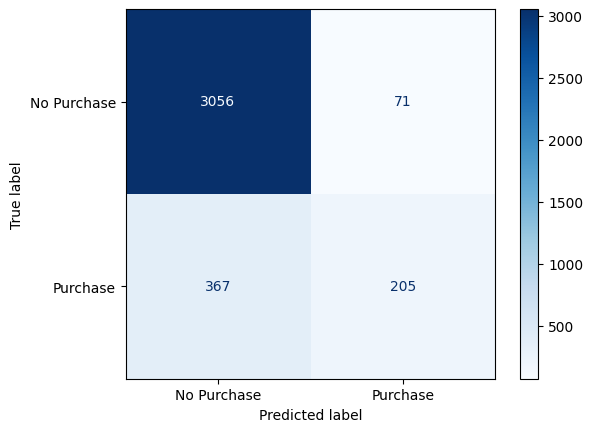

In [87]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues')
plt.show()

Дополнительная оценка результатов модели

In [88]:
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"  Precision: {precision:.3f}")
print(f"    - Из {TP+FP} предсказанных покупок, {TP} были верными")
print(f"  Recall: {recall:.3f}")
print(f"    - Из {TP+FN} реальных покупок, нашли {TP}")

  Precision: 0.743
    - Из 276 предсказанных покупок, 205 были верными
  Recall: 0.358
    - Из 572 реальных покупок, нашли 205


### Регрессия

Загрузка датасета

In [89]:
df_reg = pd.read_csv('datasets/parkinsons.csv')

Размер датасета

In [90]:
df_reg.shape

(5875, 22)

Первые 5 строк

In [91]:
df_reg.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Информация о данных

In [92]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Статистика по числовым признакам

In [93]:
df_reg.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Копирование датасета для его дальнейшего преобразования. Удаление столбца `subject#`, т.к. не несёт полезной информации

In [94]:
df_reg_clean = df_reg.copy()

df_reg_clean = df_reg_clean.drop('subject#', axis=1)

Выделение признаков и таргета, их разделение на выборки для обучения и тестирования

In [95]:
X = df_reg_clean.drop('total_UPDRS', axis=1)
y = df_reg_clean['total_UPDRS']

print(f"Количество признаков: {X.shape[1]}")
print(f"Диапазон целевой переменной: [{y.min():.2f}, {y.max():.2f}]")
print(f"Среднее значение целевой переменной: {y.mean():.2f}")
print(f"Стандартное отклонение целевой переменной: {y.std():.2f}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nРазмеры выборок:")
print(f"  Обучающая выборка: {X_train_reg.shape}")
print(f"  Тестовая выборка: {X_test_reg.shape}")

Количество признаков: 20
Диапазон целевой переменной: [7.00, 54.99]
Среднее значение целевой переменной: 29.02
Стандартное отклонение целевой переменной: 10.70

Размеры выборок:
  Обучающая выборка: (4112, 20)
  Тестовая выборка: (1763, 20)


Масштабирование данных с помощью `StandardScaler`

In [96]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

Обучение модели регрессии `LinearRegression`

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg_scaled)

Вычисление метрик

In [98]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 10.4965
RMSE: 3.2398
MAE: 2.4321
R²: 0.9067


Визуализация предсказаний

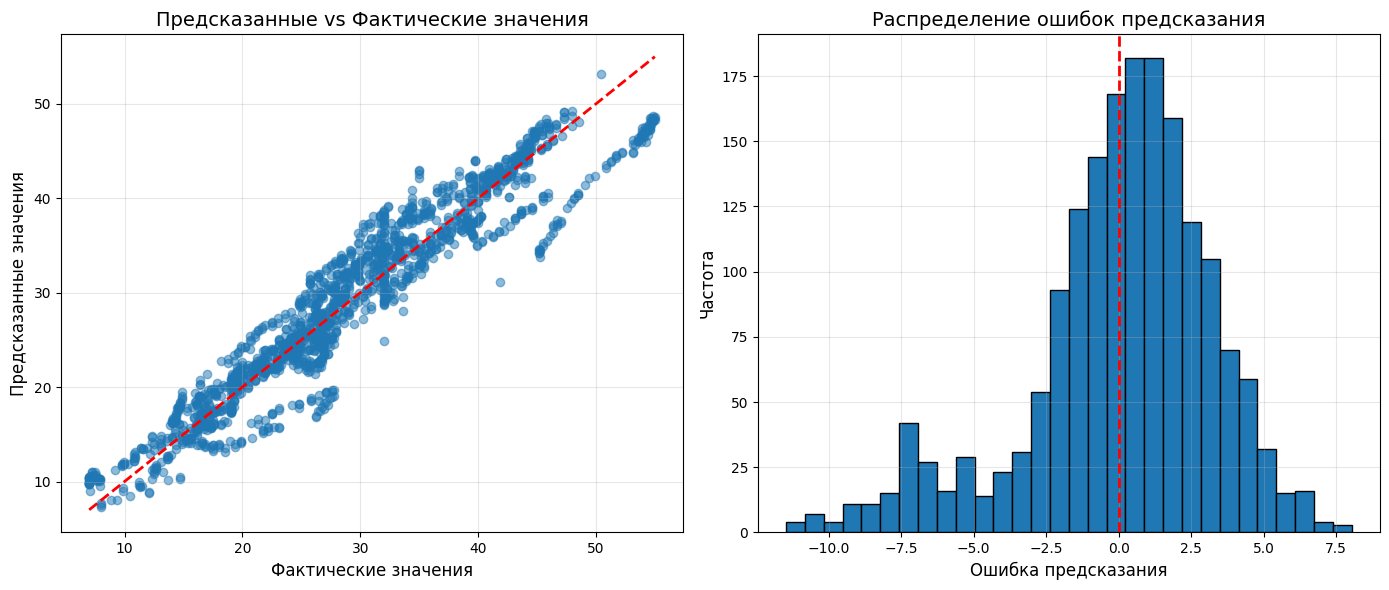

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Фактические значения', fontsize=12)
axes[0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0].set_title('Предсказанные vs Фактические значения', fontsize=14)
axes[0].grid(True, alpha=0.3)

errors = y_pred_reg - y_test_reg
axes[1].hist(errors, bins=30, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Ошибка предсказания', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].set_title('Распределение ошибок предсказания', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Результаты базовых моделей

In [100]:
print("\nКлассификация")
print("Метрики:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"- ROC-AUC:  {roc_auc:.4f}")

print("\nРегрессия")
print("Метрики:")
print(f"- MSE:  {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- MAE:  {mae:.4f}")
print(f"- R²:   {r2:.4f}")


Классификация
Метрики:
- Accuracy: 0.8816
- F1-Score: 0.4835
- ROC-AUC:  0.8716

Регрессия
Метрики:
- MSE:  10.4965
- RMSE: 3.2398
- MAE:  2.4321
- R²:   0.9067


## Улучшение бейзлайна

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

from typing import Union, Any

import warnings

### Классификация

Сохранение метрик базовой модели

In [102]:
class_base_metrics = {
    'Accuracy': accuracy,
    'F1': f1,
    'ROC-AUC': roc_auc,
    'Precision': precision,
    'Recall': recall
}

Функция сравнения метрик новой модели с базовой

In [103]:
def print_comparison_class(metrics_old, metrics_new):
    comparison_data = []
    for metric in ['Accuracy', 'F1', 'ROC-AUC', 'Precision', 'Recall']:
        base_val = metrics_old[metric]
        new_val = metrics_new[metric]
        diff = new_val - base_val
        change = "улучшение" if diff > 0 else "ухудшение"
        
        comparison_data.append({
            'Метрика': metric,
            'Базовая модель': f"{base_val:.4f}",
            'Новая модель': f"{new_val:.4f}",
            'Разница': f"{diff:+.4f}",
            'Изменение': change
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.to_string(index=False))

Повторное копирование, разделение и масштабирование данных

In [104]:
df_class_clean = df_class.copy()

categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le

X = df_class_clean.drop('Revenue', axis=1)
y = df_class_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Гипотеза 1: Балансировка классов

In [105]:
log_reg_balanced = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg_balanced.fit(X_train_scaled, y_train)
y_pred_bal = log_reg_balanced.predict(X_test_scaled)
y_proba_bal = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

metrics_bal = {
    'Accuracy': accuracy_score(y_test, y_pred_bal),
    'F1': f1_score(y_test, y_pred_bal),
    'ROC-AUC': roc_auc_score(y_test, y_proba_bal),
    'Precision': precision_score(y_test, y_pred_bal),
    'Recall': recall_score(y_test, y_pred_bal)
}

print("Балансировка классов")
print_comparison_class(class_base_metrics, metrics_bal)

Балансировка классов
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8629 -0.0187 ухудшение
       F1         0.4835       0.6202 +0.1367 улучшение
  ROC-AUC         0.8716       0.8789 +0.0073 улучшение
Precision         0.7428       0.5426 -0.2002 ухудшение
   Recall         0.3584       0.7238 +0.3654 улучшение


Гипотеза 2: Отбор признаков c балансировкой

In [106]:
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

log_reg_selected = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg_selected.fit(X_train_selected, y_train)
y_pred_sel = log_reg_selected.predict(X_test_selected)
y_proba_sel = log_reg_selected.predict_proba(X_test_selected)[:, 1]

metrics_sel = {
    'Accuracy': accuracy_score(y_test, y_pred_sel),
    'F1': f1_score(y_test, y_pred_sel),
    'ROC-AUC': roc_auc_score(y_test, y_proba_sel),
    'Precision': precision_score(y_test, y_pred_sel),
    'Recall': recall_score(y_test, y_pred_sel)
}

print("Отбор 10 лучших признаков с балансировкой")
print_comparison_class(class_base_metrics, metrics_sel)

Отбор 10 лучших признаков с балансировкой
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8624 -0.0192 ухудшение
       F1         0.4835       0.6141 +0.1306 улучшение
  ROC-AUC         0.8716       0.8747 +0.0031 улучшение
Precision         0.7428       0.5422 -0.2006 ухудшение
   Recall         0.3584       0.7080 +0.3497 улучшение


Гипотеза 3: Добавление полиномиальных признаков

In [107]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Исходное количество признаков: {X_train_scaled.shape[1]}")
print(f"Количество признаков с полиномальными: {X_train_poly.shape[1]}")

log_reg_poly = LogisticRegression(random_state=42, max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = log_reg_poly.predict(X_test_poly)
y_proba_poly = log_reg_poly.predict_proba(X_test_poly)[:, 1]

metrics_poly = {
    'Accuracy': accuracy_score(y_test, y_pred_poly),
    'F1': f1_score(y_test, y_pred_poly),
    'ROC-AUC': roc_auc_score(y_test, y_proba_poly),
    'Precision': precision_score(y_test, y_pred_poly),
    'Recall': recall_score(y_test, y_pred_poly)
}

print("Полиномиальные признаки")
print_comparison_class(class_base_metrics, metrics_poly)

Исходное количество признаков: 17
Количество признаков с полиномальными: 153
Полиномиальные признаки
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8851 +0.0035 улучшение
       F1         0.4835       0.5251 +0.0416 улучшение
  ROC-AUC         0.8716       0.8770 +0.0054 улучшение
Precision         0.7428       0.7276 -0.0152 ухудшение
   Recall         0.3584       0.4108 +0.0524 улучшение


Гипотеза 4: Настройка гиперпараметров

In [108]:
warnings.filterwarnings('ignore')

param_grid = [
    {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced'],
        'max_iter': [100, 500, 1000, 2000, 5000, 10000],
        'random_state': [42]
    },

    {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'class_weight': [None, 'balanced'],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [100, 500, 1000, 2000, 5000, 10000],
        'random_state': [42]
    }
]

log_reg_gs = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(
    estimator=log_reg_gs, param_distributions=param_grid, n_iter=100, cv=5, 
    scoring='roc_auc', random_state=42, n_jobs=-1
)
random_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

best_log_reg: Union[LogisticRegression, Any] = random_search.best_estimator_
y_pred_gs = best_log_reg.predict(X_test_scaled)
y_proba_gs = best_log_reg.predict_proba(X_test_scaled)[:, 1]

metrics_gs = {
    'Accuracy': accuracy_score(y_test, y_pred_gs),
    'F1': f1_score(y_test, y_pred_gs),
    'ROC-AUC': roc_auc_score(y_test, y_proba_gs),
    'Precision': precision_score(y_test, y_pred_gs),
    'Recall': recall_score(y_test, y_pred_gs)
}

print("Подбор гиперпараметров")
print_comparison_class(class_base_metrics, metrics_gs)

Лучшие параметры:
  solver: liblinear
  random_state: 42
  penalty: l1
  max_iter: 1000
  class_weight: balanced
  C: 0.01
Подбор гиперпараметров
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8656 -0.0160 ухудшение
       F1         0.4835       0.6215 +0.1380 улучшение
  ROC-AUC         0.8716       0.8810 +0.0094 улучшение
Precision         0.7428       0.5506 -0.1921 ухудшение
   Recall         0.3584       0.7133 +0.3549 улучшение


Формирование улучешнной модели и её обучение

In [109]:
best_params = random_search.best_params_.copy()

improved_log_reg = LogisticRegression(**best_params)
improved_log_reg.fit(X_train_scaled, y_train)

y_pred_improved = improved_log_reg.predict(X_test_scaled)
y_pred_proba_improved = improved_log_reg.predict_proba(X_test_scaled)[:, 1]

Метрики улучшенной модели

In [110]:
class_improved_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_improved),
    'F1': f1_score(y_test, y_pred_improved),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_improved),
    'Precision': precision_score(y_test, y_pred_improved),
    'Recall': recall_score(y_test, y_pred_improved)
}

for metric, value in class_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8656
F1: 0.6215
ROC-AUC: 0.8810
Precision: 0.5506
Recall: 0.7133


Сравнение улучшенной модели с базовой

In [111]:
print_comparison_class(class_base_metrics, class_improved_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8656 -0.0160 ухудшение
       F1         0.4835       0.6215 +0.1380 улучшение
  ROC-AUC         0.8716       0.8810 +0.0094 улучшение
Precision         0.7428       0.5506 -0.1921 ухудшение
   Recall         0.3584       0.7133 +0.3549 улучшение


Визуальное сравнение базовой и улучшенной модели

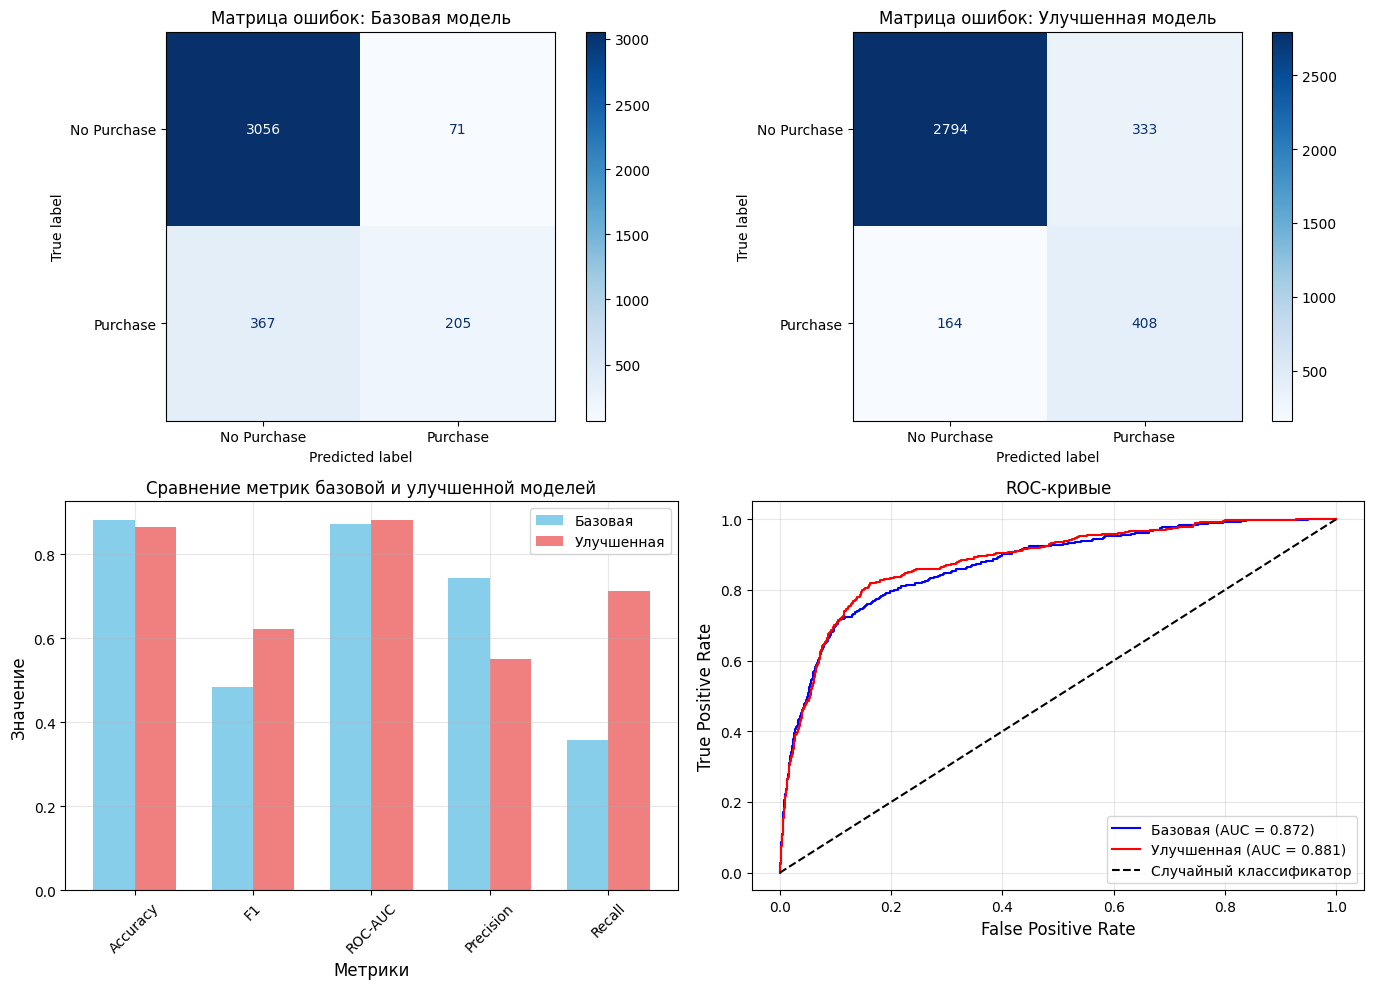

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].set_title('Матрица ошибок: Базовая модель', fontsize=12)
cm_base = confusion_matrix(y_test, y_pred)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, 
                                  display_labels=['No Purchase', 'Purchase'])
disp_base.plot(ax=axes[0, 0], cmap='Blues')

axes[0, 1].set_title('Матрица ошибок: Улучшенная модель', fontsize=12)
cm_improved = confusion_matrix(y_test, y_pred_improved)
disp_improved = ConfusionMatrixDisplay(confusion_matrix=cm_improved, 
                                       display_labels=['No Purchase', 'Purchase'])
disp_improved.plot(ax=axes[0, 1], cmap='Blues')

metrics_names = ['Accuracy', 'F1', 'ROC-AUC', 'Precision', 'Recall']
base_values = [class_base_metrics[m] for m in metrics_names]
improved_values = [class_improved_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width/2, base_values, width, label='Базовая', color='skyblue')
axes[1, 0].bar(x + width/2, improved_values, width, label='Улучшенная', color='lightcoral')
axes[1, 0].set_xlabel('Метрики', fontsize=12)
axes[1, 0].set_ylabel('Значение', fontsize=12)
axes[1, 0].set_title('Сравнение метрик базовой и улучшенной моделей', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba)
fpr_improved, tpr_improved, _ = roc_curve(y_test, y_pred_proba_improved)

axes[1, 1].plot(fpr_base, tpr_base, label=f'Базовая (AUC = {roc_auc:.3f})', color='blue')
axes[1, 1].plot(fpr_improved, tpr_improved, label=f'Улучшенная (AUC = {class_improved_metrics["ROC-AUC"]:.3f})', color='red')
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
axes[1, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[1, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[1, 1].set_title('ROC-кривые', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Анализ результатов классификации

In [113]:
TN_base, FP_base, FN_base, TP_base = cm_base.ravel()
TN_imp, FP_imp, FN_imp, TP_imp = cm_improved.ravel()

print("\n1. Анализ обнаружения покупок:")
print(f"   Базовая модель нашла {TP_base} из {TP_base + FN_base} реальных покупок")
print(f"   Улучшенная модель нашла {TP_imp} из {TP_imp + FN_imp} реальных покупок")
print(f"   Улучшение в обнаружении покупок: {TP_imp - TP_base} реальных покупок")
print(f"   Процентное улучшение Recall: {((TP_imp / (TP_imp + FN_imp)) - (TP_base / (TP_base + FN_base))) * 100:+.1f}%")

print("\n2. Анализ ложных срабатываний:")
print(f"   Базовая модель: {FP_base} ложных предсказаний покупки")
print(f"   Улучшенная модель: {FP_imp} ложных предсказаний покупки")
print(f"   Изменение: {FP_imp - FP_base} дополнительных ложных срабатываний")


1. Анализ обнаружения покупок:
   Базовая модель нашла 205 из 572 реальных покупок
   Улучшенная модель нашла 408 из 572 реальных покупок
   Улучшение в обнаружении покупок: 203 реальных покупок
   Процентное улучшение Recall: +35.5%

2. Анализ ложных срабатываний:
   Базовая модель: 71 ложных предсказаний покупки
   Улучшенная модель: 333 ложных предсказаний покупки
   Изменение: 262 дополнительных ложных срабатываний


### Регрессия

Сохранение метрик базовой модели

In [114]:
reg_base_metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

Функция сравнения метрик новой модели с базовой

In [115]:
def print_comparison_reg(metrics_old, metrics_new):
    comparison_data = []
    for metric in ['MSE', 'RMSE', 'MAE', 'R²']:
        base_val = metrics_old[metric]
        new_val = metrics_new[metric]
        diff = new_val - base_val
        if metric == 'R²':
            change = "улучшение" if diff > 0 else "ухудшение"
        else:
            change = "улучшение" if diff < 0 else "ухудшение"
        
        comparison_data.append({
            'Метрика': metric,
            'Базовая модель': f"{base_val:.4f}",
            'Новая модель': f"{new_val:.4f}",
            'Разница': f"{diff:+.4f}",
            'Изменение': change
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.to_string(index=False))

Повторное копирование и подготовка данных

In [116]:
df_reg_clean = df_reg.copy()
df_reg_clean = df_reg_clean.drop('subject#', axis=1)

X = df_reg_clean.drop('total_UPDRS', axis=1)
y = df_reg_clean['total_UPDRS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Гипотеза 1: Обработка выбросов с помощью RobustScaler

In [117]:
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

lin_reg_robust = LinearRegression()
lin_reg_robust.fit(X_train_robust, y_train)
y_pred_robust = lin_reg_robust.predict(X_test_robust)

metrics_robust = {
    'MSE': mean_squared_error(y_test, y_pred_robust),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_robust)),
    'MAE': mean_absolute_error(y_test, y_pred_robust),
    'R²': r2_score(y_test, y_pred_robust)
}

print("RobustScaler (устойчивое масштабирование)")
print_comparison_reg(reg_base_metrics, metrics_robust)

RobustScaler (устойчивое масштабирование)
Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965      10.4965 -0.0000 улучшение
   RMSE         3.2398       3.2398 -0.0000 улучшение
    MAE         2.4321       2.4321 -0.0000 улучшение
     R²         0.9067       0.9067 +0.0000 улучшение


Гипотеза 2: Логарифмическое преобразование целевой переменной

In [118]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lin_reg_log = LinearRegression()
lin_reg_log.fit(X_train_scaled, y_train_log)
y_pred_log = lin_reg_log.predict(X_test_scaled)

y_pred_exp = np.expm1(y_pred_log)

metrics_log = {
    'MSE': mean_squared_error(y_test, y_pred_exp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_exp)),
    'MAE': mean_absolute_error(y_test, y_pred_exp),
    'R²': r2_score(y_test, y_pred_exp)
}

print("Логарифмирование целевой переменной")
print_comparison_reg(reg_base_metrics, metrics_log)

Логарифмирование целевой переменной
Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965      12.6509 +2.1544 ухудшение
   RMSE         3.2398       3.5568 +0.3170 ухудшение
    MAE         2.4321       2.7039 +0.2718 ухудшение
     R²         0.9067       0.8875 -0.0192 ухудшение


Гипотеза 3: Добавление полиномиальных признаков

In [119]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Исходное количество признаков: {X_train_scaled.shape[1]}")
print(f"Количество признаков с полиномиальными: {X_train_poly.shape[1]}")

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

metrics_poly = {
    'MSE': mean_squared_error(y_test, y_pred_poly),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'R²': r2_score(y_test, y_pred_poly)
}

print("Полиномиальные признаки (степень 2)")
print_comparison_reg(reg_base_metrics, metrics_poly)

Исходное количество признаков: 20
Количество признаков с полиномиальными: 210
Полиномиальные признаки (степень 2)
Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965       7.0020 -3.4946 улучшение
   RMSE         3.2398       2.6461 -0.5937 улучшение
    MAE         2.4321       2.0288 -0.4033 улучшение
     R²         0.9067       0.9377 +0.0311 улучшение


Гипотеза 4: Использование регуляризации (Ridge регрессия)

In [120]:
warnings.filterwarnings('ignore')

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'lsqr', 'saga'],
    'max_iter': [100, 500, 1000, 2000],
    'random_state': [42]
}

ridge = Ridge(random_state=42)
random_search_reg = RandomizedSearchCV(
    estimator=ridge, param_distributions=param_grid, n_iter=20, cv=5, 
    scoring='r2', random_state=42, n_jobs=-1
)
random_search_reg.fit(X_train_poly, y_train)

print("Лучшие параметры Ridge:")
for param, value in random_search_reg.best_params_.items():
    print(f"  {param}: {value}")

best_ridge: Union[Ridge, Any] = random_search_reg.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_poly)

metrics_ridge = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'R²': r2_score(y_test, y_pred_ridge),
}
print("Ridge регрессия с подбором гиперпараметров")
print_comparison_reg(reg_base_metrics, metrics_ridge)

Лучшие параметры Ridge:
  solver: svd
  random_state: 42
  max_iter: 100
  fit_intercept: True
  alpha: 1
Ridge регрессия с подбором гиперпараметров
Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965       7.1598 -3.3367 улучшение
   RMSE         3.2398       2.6758 -0.5640 улучшение
    MAE         2.4321       2.0082 -0.4239 улучшение
     R²         0.9067       0.9363 +0.0297 улучшение


Формирование улучшенной модели и её обучение

In [121]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

best_params = random_search_reg.best_params_.copy()

improved_model = Ridge(**best_params)
improved_model.fit(X_train_poly, y_train)
y_pred_improved = improved_model.predict(X_test_poly)

Метрики улучшенной модели

In [122]:
reg_improved_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_improved),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_improved)),
    'MAE': mean_absolute_error(y_test, y_pred_improved),
    'R²': r2_score(y_test, y_pred_improved)
}

for metric, value in reg_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 7.1598
RMSE: 2.6758
MAE: 2.0082
R²: 0.9363


Сравнение улучшенной модели с базовой

In [123]:
print_comparison_reg(reg_base_metrics, reg_improved_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965       7.1598 -3.3367 улучшение
   RMSE         3.2398       2.6758 -0.5640 улучшение
    MAE         2.4321       2.0082 -0.4239 улучшение
     R²         0.9067       0.9363 +0.0297 улучшение


Визуальное сравнение базовой и улучшенной модели

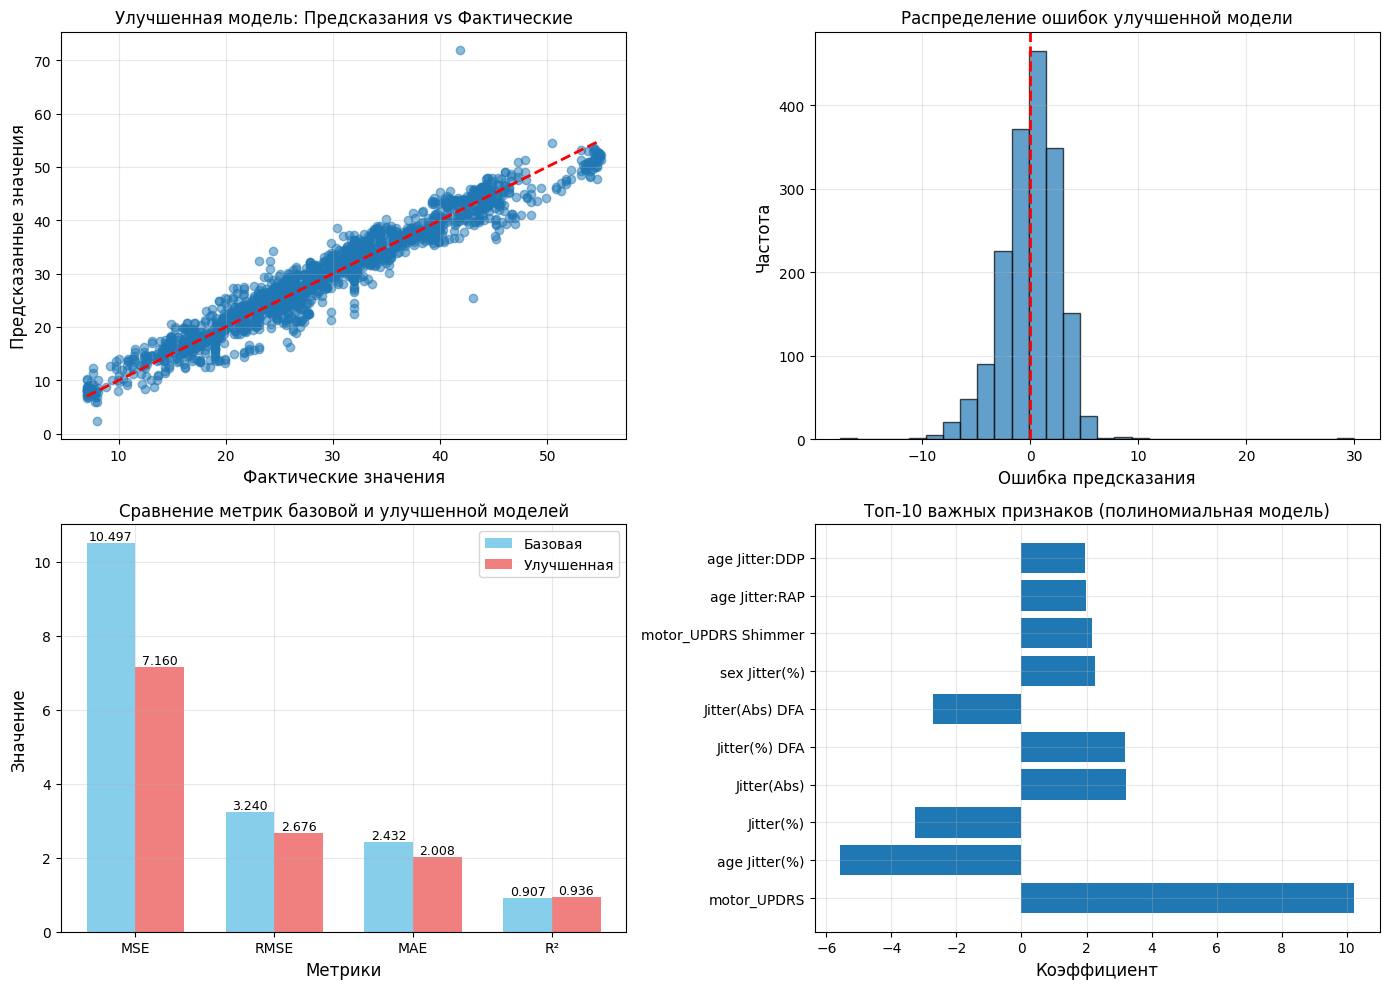

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(y_test, y_pred_improved, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Фактические значения', fontsize=12)
axes[0, 0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0, 0].set_title('Улучшенная модель: Предсказания vs Фактические', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

errors_improved = y_pred_improved - y_test
axes[0, 1].hist(errors_improved, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Ошибка предсказания', fontsize=12)
axes[0, 1].set_ylabel('Частота', fontsize=12)
axes[0, 1].set_title('Распределение ошибок улучшенной модели', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

metrics_names = ['MSE', 'RMSE', 'MAE', 'R²']
base_values = [reg_base_metrics[m] for m in metrics_names]
improved_values = [reg_improved_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, base_values, width, label='Базовая', color='skyblue')
bars2 = axes[1, 0].bar(x + width/2, improved_values, width, label='Улучшенная', color='lightcoral')
axes[1, 0].set_xlabel('Метрики', fontsize=12)
axes[1, 0].set_ylabel('Значение', fontsize=12)
axes[1, 0].set_title('Сравнение метрик базовой и улучшенной моделей', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

for bar in bars1 + bars2:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=9)

poly_feature_names = poly.get_feature_names_out(X.columns)

feature_importance = pd.DataFrame({
    'Признак': poly_feature_names,
    'Коэффициент': improved_model.coef_
}).sort_values('Коэффициент', key=abs, ascending=False).head(10)

axes[1, 1].barh(feature_importance['Признак'], feature_importance['Коэффициент'])
axes[1, 1].set_xlabel('Коэффициент', fontsize=12)
axes[1, 1].set_title('Топ-10 важных признаков (полиномиальная модель)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Анализ результатов регрессии

In [125]:
print(f"\n1. Анализ улучшения модели:")
print(f"   R² увеличился с {reg_base_metrics['R²']:.4f} до {reg_improved_metrics['R²']:.4f}")
print(f"   Улучшение R²: {reg_improved_metrics['R²'] - reg_base_metrics['R²']:+.4f}")
print(f"   MSE уменьшился с {reg_base_metrics['MSE']:.4f} до {reg_improved_metrics['MSE']:.4f}")
print(f"   Улучшение MSE: {reg_base_metrics['MSE'] - reg_improved_metrics['MSE']:.4f} ({(1 - reg_improved_metrics['MSE']/reg_base_metrics['MSE'])*100:.2f}%)")

print(f"\n2. Статистика ошибок улучшенной модели:")
print(f"   Средняя абсолютная ошибка: {reg_improved_metrics['MAE']:.2f}")
print(f"   Средняя ошибка в процентах от среднего target: {reg_improved_metrics['MAE']/y_test.mean()*100:.2f}%")
print(f"   Стандартное отклонение ошибок: {np.std(errors_improved):.2f}")

print(f"\n3. Интерпретируемость модели:")
print(f"   Наиболее важные признаки (по абсолютному значению коэффициентов):")
for idx, row in feature_importance.head(5).iterrows():
    print(f"     {row['Признак']}: {row['Коэффициент']:.4f}")


1. Анализ улучшения модели:
   R² увеличился с 0.9067 до 0.9363
   Улучшение R²: +0.0297
   MSE уменьшился с 10.4965 до 7.1598
   Улучшение MSE: 3.3367 (31.79%)

2. Статистика ошибок улучшенной модели:
   Средняя абсолютная ошибка: 2.01
   Средняя ошибка в процентах от среднего target: 6.91%
   Стандартное отклонение ошибок: 2.68

3. Интерпретируемость модели:
   Наиболее важные признаки (по абсолютному значению коэффициентов):
     motor_UPDRS: 10.2367
     age Jitter(%): -5.5758
     Jitter(%): -3.2804
     Jitter(Abs): 3.2121
     Jitter(%) DFA: 3.1779


## Имплементация алгоритма машинного обучения 

### Классификация

Кастомная модель логистической регрессии

In [126]:
class CustomLogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=None, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.weights: np.ndarray = np.array([])
        self.bias = None
        self.loss_history = []
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        if self.regularization == 'l1':
            loss += self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            loss += self.lambda_reg * np.sum(self.weights**2)
            
        return loss
    
    def fit(self, X, y, class_weight=None):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        
        if class_weight is not None:
            if class_weight == 'balanced':
                class_counts = np.bincount(y)
                n_classes = len(class_counts)
                weight_per_class = {}
                
                for i in range(n_classes):
                    weight_per_class[i] = n_samples / (n_classes * class_counts[i])
                
                sample_weights = np.array([weight_per_class[label] for label in y])
            else:
                sample_weights = np.array([class_weight[label] for label in y])
        else:
            sample_weights = np.ones(n_samples)

        for iteration in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y) * sample_weights)
            db = (1 / n_samples) * np.sum((y_pred - y) * sample_weights)

            if self.regularization == 'l1':
                dw += self.lambda_reg * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += 2 * self.lambda_reg * self.weights

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)

            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss:.4f}")
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'loss_history': self.loss_history
        }

Повторное копирование и разбиение данных

In [127]:
df_class_clean = df_class.copy()

categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le

X_class = df_class_clean.drop('Revenue', axis=1)
y_class = df_class_clean['Revenue']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

Обучение кастомной логистической регрессии

In [128]:
custom_log_reg = CustomLogisticRegression(
    learning_rate=0.1,
    n_iterations=2000,
    regularization='l2',
    lambda_reg=0.01
)

custom_log_reg.fit(X_train_class_scaled, y_train_class)

y_pred_custom_log = custom_log_reg.predict(X_test_class_scaled)
y_pred_proba_custom_log = custom_log_reg.predict_proba(X_test_class_scaled)

Iteration 0, Loss: 0.6932
Iteration 100, Loss: 0.3365
Iteration 200, Loss: 0.3182
Iteration 300, Loss: 0.3151
Iteration 400, Loss: 0.3143
Iteration 500, Loss: 0.3140
Iteration 600, Loss: 0.3139
Iteration 700, Loss: 0.3139
Iteration 800, Loss: 0.3139
Iteration 900, Loss: 0.3139
Iteration 1000, Loss: 0.3139
Iteration 1100, Loss: 0.3139
Iteration 1200, Loss: 0.3139
Iteration 1300, Loss: 0.3139
Iteration 1400, Loss: 0.3139
Iteration 1500, Loss: 0.3139
Iteration 1600, Loss: 0.3139
Iteration 1700, Loss: 0.3139
Iteration 1800, Loss: 0.3139
Iteration 1900, Loss: 0.3139


Метрики кастомной логистической регрессии

In [129]:
custom_class_base_metrics = {
    'Accuracy': accuracy_score(y_test_class, y_pred_custom_log),
    'F1': f1_score(y_test_class, y_pred_custom_log),
    'ROC-AUC': roc_auc_score(y_test_class, y_pred_proba_custom_log),
    'Precision': precision_score(y_test_class, y_pred_custom_log),
    'Recall': recall_score(y_test_class, y_pred_custom_log)
}

for metric, value in custom_class_base_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8735
F1: 0.4046
ROC-AUC: 0.8746
Precision: 0.7430
Recall: 0.2780


Сравнение кастомной модели с базовой из sklearn

In [130]:
print_comparison_class(class_base_metrics, custom_class_base_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8816       0.8735 -0.0081 ухудшение
       F1         0.4835       0.4046 -0.0789 ухудшение
  ROC-AUC         0.8716       0.8746 +0.0031 улучшение
Precision         0.7428       0.7430 +0.0002 улучшение
   Recall         0.3584       0.2780 -0.0804 ухудшение


Обучение улучшенной кастомной логистическая регрессии

In [131]:
improved_custom_log_reg = CustomLogisticRegression(
    learning_rate=0.05,
    n_iterations=3000,
    regularization='l1',
    lambda_reg=0.01
)

improved_custom_log_reg.fit(X_train_class_scaled, y_train_class, class_weight='balanced')

y_pred_imp_custom = improved_custom_log_reg.predict(X_test_class_scaled)
y_pred_proba_imp_custom = improved_custom_log_reg.predict_proba(X_test_class_scaled)

Iteration 0, Loss: 0.6938
Iteration 100, Loss: 0.5601
Iteration 200, Loss: 0.5126
Iteration 300, Loss: 0.4916
Iteration 400, Loss: 0.4818
Iteration 500, Loss: 0.4768
Iteration 600, Loss: 0.4741
Iteration 700, Loss: 0.4728
Iteration 800, Loss: 0.4721
Iteration 900, Loss: 0.4717
Iteration 1000, Loss: 0.4715
Iteration 1100, Loss: 0.4715
Iteration 1200, Loss: 0.4715
Iteration 1300, Loss: 0.4716
Iteration 1400, Loss: 0.4716
Iteration 1500, Loss: 0.4718
Iteration 1600, Loss: 0.4721
Iteration 1700, Loss: 0.4722
Iteration 1800, Loss: 0.4723
Iteration 1900, Loss: 0.4723
Iteration 2000, Loss: 0.4723
Iteration 2100, Loss: 0.4723
Iteration 2200, Loss: 0.4723
Iteration 2300, Loss: 0.4724
Iteration 2400, Loss: 0.4724
Iteration 2500, Loss: 0.4724
Iteration 2600, Loss: 0.4724
Iteration 2700, Loss: 0.4724
Iteration 2800, Loss: 0.4724
Iteration 2900, Loss: 0.4724


Метрики улучшенной кастомной логистической регрессии

In [132]:
custom_improved_metrics = {
    'Accuracy': accuracy_score(y_test_class, y_pred_imp_custom),
    'F1': f1_score(y_test_class, y_pred_imp_custom),
    'ROC-AUC': roc_auc_score(y_test_class, y_pred_proba_imp_custom),
    'Precision': precision_score(y_test_class, y_pred_imp_custom),
    'Recall': recall_score(y_test_class, y_pred_imp_custom)
}

for metric, value in custom_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8681
F1: 0.6223
ROC-AUC: 0.8798
Precision: 0.5583
Recall: 0.7028


Сравнение улучшенной кастомной модели с улучшенной из sklearn

In [133]:
print_comparison_class(class_improved_metrics, custom_improved_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8656       0.8681 +0.0024 улучшение
       F1         0.6215       0.6223 +0.0008 улучшение
  ROC-AUC         0.8810       0.8798 -0.0011 ухудшение
Precision         0.5506       0.5583 +0.0077 улучшение
   Recall         0.7133       0.7028 -0.0105 ухудшение


Итоговое сравнение всех моделей классификации

In [134]:
summary_class = pd.DataFrame({
    'Тип модели': ['Базовая (sklearn)', 'Улучшенная (sklearn)', 'Кастомная (базовая)', 'Кастомная (улучшенная)'],
    'Accuracy': [class_base_metrics['Accuracy'], class_improved_metrics['Accuracy'], custom_class_base_metrics['Accuracy'], custom_improved_metrics['Accuracy']],
    'F1-Score': [class_base_metrics['F1'], class_improved_metrics['F1'], custom_class_base_metrics['F1'], custom_improved_metrics['F1']],
    'ROC-AUC': [class_base_metrics['ROC-AUC'], class_improved_metrics['ROC-AUC'], custom_class_base_metrics['ROC-AUC'], custom_improved_metrics['ROC-AUC']],
    'Recall': [class_base_metrics['Recall'], class_improved_metrics['Recall'], custom_class_base_metrics['Recall'], custom_improved_metrics['Recall']]
})

print("Сводная таблица моделей классификации")
print(summary_class.to_string(index=False))

Сводная таблица моделей классификации
            Тип модели  Accuracy  F1-Score  ROC-AUC   Recall
     Базовая (sklearn)  0.881590  0.483491 0.871561 0.358392
  Улучшенная (sklearn)  0.865639  0.621478 0.880971 0.713287
   Кастомная (базовая)  0.873479  0.404580 0.874637 0.277972
Кастомная (улучшенная)  0.868072  0.622291 0.879840 0.702797


Визуализация сравнения всех моделей классификации

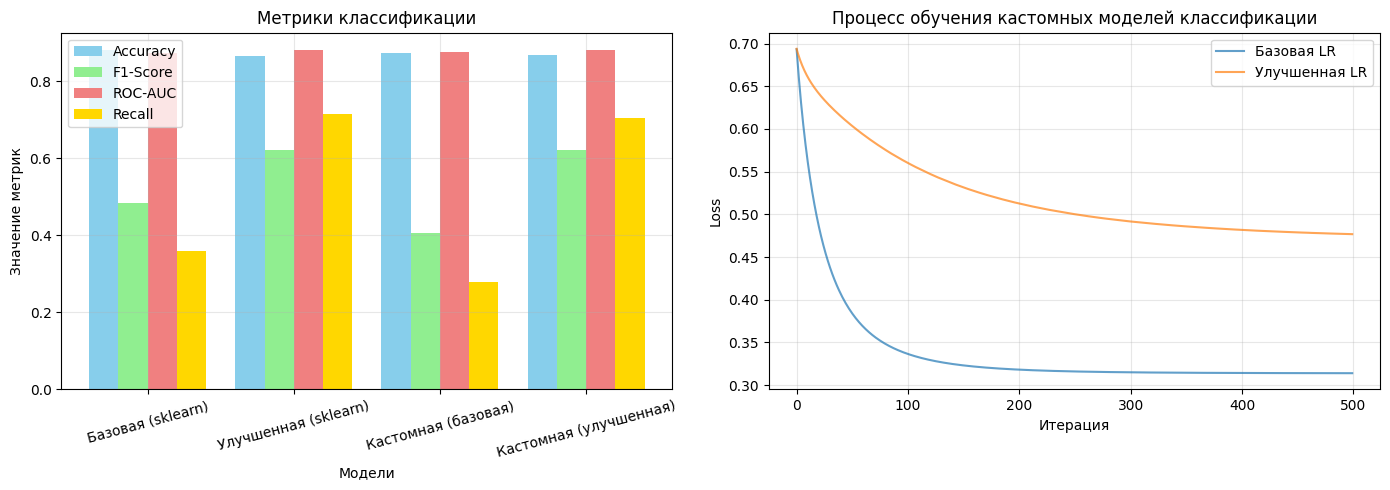

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(summary_class))
width = 0.2

axes[0].bar(x - width*1.5, summary_class['Accuracy'], width, label='Accuracy', color='skyblue')
axes[0].bar(x - width/2, summary_class['F1-Score'], width, label='F1-Score', color='lightgreen')
axes[0].bar(x + width/2, summary_class['ROC-AUC'], width, label='ROC-AUC', color='lightcoral')
axes[0].bar(x + width*1.5, summary_class['Recall'], width, label='Recall', color='gold')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Значение метрик')
axes[0].set_title('Метрики классификации')
axes[0].set_xticks(x)
axes[0].set_xticklabels(summary_class['Тип модели'], rotation=15)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(custom_log_reg.loss_history[:500], label='Базовая LR', alpha=0.7)
axes[1].plot(improved_custom_log_reg.loss_history[:500], label='Улучшенная LR', alpha=0.7)
axes[1].set_xlabel('Итерация')
axes[1].set_ylabel('Loss')
axes[1].set_title('Процесс обучения кастомных моделей классификации')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Регрессия

Кастомная модель линейной регрессии

In [136]:
class CustomLinearRegression:

    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=None, 
                 lambda_reg=0.1, adaptive_lr=True, early_stopping=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.adaptive_lr = adaptive_lr
        self.early_stopping = early_stopping
        self.weights: np.ndarray = np.array([])
        self.bias = None
        self.loss_history = []
        
    def _initialize_weights(self, n_features):
        limit = np.sqrt(2.0 / n_features) if n_features > 1 else 0.01
        self.weights = np.random.normal(0, limit, n_features)
        self.bias = 0.0
        
    def _compute_loss(self, y_true, y_pred):
        epsilon = 1e-8
        mse = np.mean((y_true - y_pred) ** 2) + epsilon

        if self.weights is not None:
            if self.regularization == 'l1':
                mse += self.lambda_reg * np.sum(np.abs(self.weights))
            elif self.regularization == 'l2':
                mse += self.lambda_reg * np.sum(self.weights ** 2)
                
        return mse
    
    def _compute_gradients(self, X, y_true, y_pred):
        n_samples = X.shape[0]
        error = y_pred - y_true
        
        dw = (1 / n_samples) * np.dot(X.T, error)
        db = (1 / n_samples) * np.sum(error)

        if self.regularization == 'l1':
            dw += self.lambda_reg * np.sign(self.weights)
        elif self.regularization == 'l2':
            dw += 2 * self.lambda_reg * self.weights
            
        return dw, db
    
    def fit(self, X, y, verbose=False):
        n_samples, n_features = X.shape

        self._initialize_weights(n_features)

        current_lr = self.learning_rate
        if n_features > 100:
            current_lr = min(self.learning_rate, 0.001)
        
        best_loss = float('inf')
        patience_counter = 0
        patience_limit = 50 if n_features > 100 else 30

        for iteration in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            dw, db = self._compute_gradients(X, y, y_pred)
   
            self.weights -= current_lr * dw
            self.bias -= current_lr * db

            if self.adaptive_lr and iteration > 100 and iteration % 100 == 0:
                if len(self.loss_history) > 100:
                    recent_improvement = self.loss_history[-100] - self.loss_history[-1]
                    if recent_improvement < 1e-4:
                        current_lr *= 0.9
                        if verbose:
                            print(f"  Уменьшение LR до: {current_lr:.6f}")

            if self.early_stopping:
                if loss < best_loss - 1e-6:
                    best_loss = loss
                    patience_counter = 0
                else:
                    patience_counter += 1
                
                if patience_counter >= patience_limit:
                    if verbose:
                        print(f"  Ранняя остановка на итерации {iteration}")
                    break
            
            if verbose and iteration % 500 == 0:
                print(f"Iteration {iteration}, Loss: {loss:.4f}, LR: {current_lr:.6f}")
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'loss_history': self.loss_history
        }

Повторное копирование и разбиение данных

In [137]:
df_reg_clean = df_reg.copy()

df_reg_clean = df_reg_clean.drop('subject#', axis=1)

X_reg = df_reg_clean.drop('total_UPDRS', axis=1)
y_reg = df_reg_clean['total_UPDRS']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

Обучение кастомной линейной регрессии

In [138]:
custom_lin_reg = CustomLinearRegression(
    learning_rate=0.01,
    n_iterations=2000,
    regularization='l2',
    lambda_reg=0.01
)

custom_lin_reg.fit(X_train_reg_scaled, y_train_reg)

y_pred_custom_reg = custom_lin_reg.predict(X_test_reg_scaled)

Метрики кастомной линейной регрессии

In [139]:
custom_reg_base_metrics = {
    'MSE': mean_squared_error(y_test_reg, y_pred_custom_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_custom_reg)),
    'MAE': mean_absolute_error(y_test_reg, y_pred_custom_reg),
    'R²': r2_score(y_test_reg, y_pred_custom_reg)
}

for metric, value in custom_reg_base_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 10.5557
RMSE: 3.2490
MAE: 2.4144
R²: 0.9062


Сравнение кастомной модели с базовой из sklearn

In [140]:
print_comparison_reg(reg_base_metrics, custom_reg_base_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE        10.4965      10.5557 +0.0592 ухудшение
   RMSE         3.2398       3.2490 +0.0091 ухудшение
    MAE         2.4321       2.4144 -0.0177 улучшение
     R²         0.9067       0.9062 -0.0005 ухудшение


Обучение улучшенной кастомной линейной регрессии

In [141]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_reg_scaled)
X_test_poly = poly.transform(X_test_reg_scaled)

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

improved_custom_lin_reg = CustomLinearRegression(
    learning_rate=0.001,
    n_iterations=5000,    
    regularization='l2',  
    lambda_reg=0.1,       
    adaptive_lr=True,     
    early_stopping=True
)

improved_custom_lin_reg.fit(X_train_poly_scaled, y_train_reg, verbose=True)

y_pred_imp_custom_reg = improved_custom_lin_reg.predict(X_test_poly_scaled)


Iteration 0, Loss: 957.4734, LR: 0.001000
Iteration 500, Loss: 354.6059, LR: 0.001000
Iteration 1000, Loss: 142.5198, LR: 0.001000
Iteration 1500, Loss: 64.8646, LR: 0.001000
Iteration 2000, Loss: 36.0020, LR: 0.001000
Iteration 2500, Loss: 25.1069, LR: 0.001000
Iteration 3000, Loss: 20.9037, LR: 0.001000
Iteration 3500, Loss: 19.2258, LR: 0.001000
Iteration 4000, Loss: 18.5191, LR: 0.001000
Iteration 4500, Loss: 18.1973, LR: 0.001000


Метрики улучшенной кастомной линейной регрессии

In [142]:
custom_reg_improved_metrics = {
    'MSE': mean_squared_error(y_test_reg, y_pred_imp_custom_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_imp_custom_reg)),
    'MAE': mean_absolute_error(y_test_reg, y_pred_imp_custom_reg),
    'R²': r2_score(y_test_reg, y_pred_imp_custom_reg)
}

for metric, value in custom_reg_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 10.6476
RMSE: 3.2631
MAE: 2.4921
R²: 0.9053


Сравнение улучшенной модели с улучшенной из sklearn

In [143]:
print_comparison_reg(reg_improved_metrics, custom_reg_improved_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE         7.1598      10.6476 +3.4878 ухудшение
   RMSE         2.6758       3.2631 +0.5873 ухудшение
    MAE         2.0082       2.4921 +0.4838 ухудшение
     R²         0.9363       0.9053 -0.0310 ухудшение


Итоговое сравнение всех моделей регрессии

In [144]:
summary_reg = pd.DataFrame({
    'Тип модели': ['Базовая (sklearn)', 'Улучшенная (sklearn)', 'Кастомная (базовая)', 'Кастомная (улучшенная)'],
    'MSE': [reg_base_metrics['MSE'], reg_improved_metrics['MSE'], custom_reg_base_metrics['MSE'], custom_reg_improved_metrics['MSE']],
    'RMSE': [reg_base_metrics['RMSE'], reg_improved_metrics['RMSE'], custom_reg_base_metrics['RMSE'], custom_reg_improved_metrics['RMSE']],
    'MAE': [reg_base_metrics['MAE'], reg_improved_metrics['MAE'], custom_reg_base_metrics['MAE'], custom_reg_improved_metrics['MAE']],
    'R²': [reg_base_metrics['R²'], reg_improved_metrics['R²'], custom_reg_base_metrics['R²'], custom_reg_improved_metrics['R²']]
})

print("\nСводная таблица моделей регрессии")
print(summary_reg.to_string(index=False))


Сводная таблица моделей регрессии
            Тип модели       MSE     RMSE      MAE       R²
     Базовая (sklearn) 10.496511 3.239832 2.432137 0.906681
  Улучшенная (sklearn)  7.159833 2.675786 2.008223 0.936346
   Кастомная (базовая) 10.555726 3.248958 2.414401 0.906155
Кастомная (улучшенная) 10.647605 3.263067 2.492055 0.905338


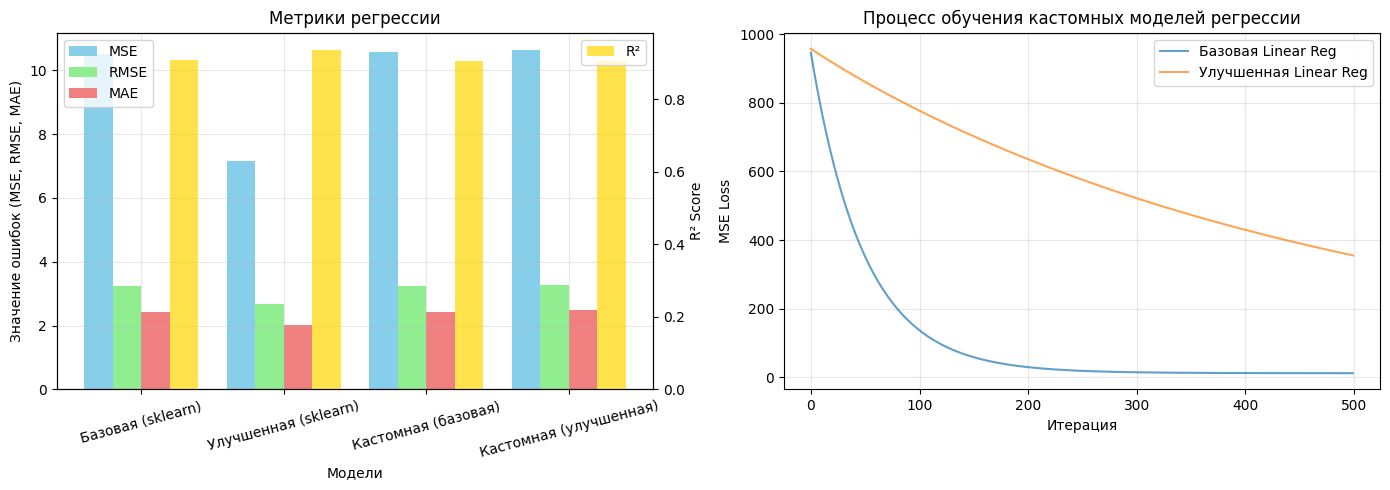

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(summary_reg))
width = 0.2

axes[0].bar(x - width*1.5, summary_reg['MSE'], width, label='MSE', color='skyblue')
axes[0].bar(x - width/2, summary_reg['RMSE'], width, label='RMSE', color='lightgreen')
axes[0].bar(x + width/2, summary_reg['MAE'], width, label='MAE', color='lightcoral')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Значение ошибок (MSE, RMSE, MAE)')
axes[0].set_title('Метрики регрессии')
axes[0].set_xticks(x)
axes[0].set_xticklabels(summary_reg['Тип модели'], rotation=15)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

ax2 = axes[0].twinx()
ax2.bar(x + width*1.5, summary_reg['R²'], width, label='R²', color='gold', alpha=0.7)
ax2.set_ylabel('R² Score')
ax2.legend(loc='upper right')

axes[1].plot(custom_lin_reg.loss_history[:500], label='Базовая Linear Reg', alpha=0.7)
axes[1].plot(improved_custom_lin_reg.loss_history[:500], label='Улучшенная Linear Reg', alpha=0.7)
axes[1].set_xlabel('Итерация')
axes[1].set_ylabel('MSE Loss')
axes[1].set_title('Процесс обучения кастомных моделей регрессии')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Выводы и анализ результатов

In [ ]:
print("СРАВНЕНИЕ БАЗОВЫХ И КАСТОМНЫХ МОДЕЛЕЙ:")

print("\nКлассификация:")
print("  • Кастомная реализация логистической регрессии показала:")
print(f"    - Accuracy: {custom_class_base_metrics['Accuracy']:.4f} vs {class_base_metrics['Accuracy']:.4f} (sklearn)")
print(f"    - F1-Score: {custom_class_base_metrics['F1']:.4f} vs {class_base_metrics['F1']:.4f} (sklearn)")
print(f"    - Recall:   {custom_class_base_metrics['Recall']:.4f} vs {class_base_metrics['Recall']:.4f} (sklearn)")

print("\nРегрессия:")
print("  • Кастомная реализация линейной регрессии показала:")
print(f"    - R²:  {custom_reg_base_metrics['R²']:.4f} vs {reg_base_metrics['R²']:.4f} (sklearn)")
print(f"    - MSE: {custom_reg_base_metrics['MSE']:.4f} vs {reg_base_metrics['MSE']:.4f} (sklearn)")

print("ЭФФЕКТИВНОСТЬ ТЕХНИК УЛУЧШЕНИЯ:")

print("\nКлассификация:")
print(f"  • Улучшенная кастомная модель vs базовая кастомная:")
print(f"    - F1-Score улучшился: {custom_improved_metrics['F1']:.4f} vs {custom_class_base_metrics['F1']:.4f} (+{custom_improved_metrics['F1'] - custom_class_base_metrics['F1']:.4f})")
print(f"    - Recall улучшился:   {custom_improved_metrics['Recall']:.4f} vs {custom_class_base_metrics['Recall']:.4f} (+{custom_improved_metrics['Recall'] - custom_class_base_metrics['Recall']:.4f})")
print(f"  • Улучшенная кастомная vs улучшенная sklearn:")
print(f"    - F1-Score: {custom_improved_metrics['F1']:.4f} vs {class_improved_metrics['F1']:.4f}")
print(f"    - Recall:   {custom_improved_metrics['Recall']:.4f} vs {class_improved_metrics['Recall']:.4f}")

print("\nРегрессия:")
print(f"  • Улучшенная кастомная модель vs базовая кастомная:")
print(f"    - R² улучшился:  {custom_reg_improved_metrics['R²']:.4f} vs {custom_reg_base_metrics['R²']:.4f} (+{custom_reg_improved_metrics['R²'] - custom_reg_base_metrics['R²']:.4f})")
print(f"    - MSE уменьшился: {custom_reg_improved_metrics['MSE']:.4f} vs {custom_reg_base_metrics['MSE']:.4f} ({custom_reg_base_metrics['MSE'] - custom_reg_improved_metrics['MSE']:.4f})")
print(f"  • Улучшенная кастомная vs улучшенная sklearn:")
print(f"    - R²:  {custom_reg_improved_metrics['R²']:.4f} vs {reg_improved_metrics['R²']:.4f}")
print(f"    - MSE: {custom_reg_improved_metrics['MSE']:.4f} vs {reg_improved_metrics['MSE']:.4f}")

СРАВНЕНИЕ БАЗОВЫХ И КАСТОМНЫХ МОДЕЛЕЙ:

Классификация:
  • Кастомная реализация логистической регрессии показала:
    - Accuracy: 0.8735 vs 0.8816 (sklearn)
    - F1-Score: 0.4046 vs 0.4835 (sklearn)
    - Recall:   0.2780 vs 0.3584 (sklearn)

Регрессия:
  • Кастомная реализация линейной регрессии показала:
    - R²:  0.9062 vs 0.9067 (sklearn)
    - MSE: 10.5557 vs 10.4965 (sklearn)
ЭФФЕКТИВНОСТЬ ТЕХНИК УЛУЧШЕНИЯ:

Классификация (балансировка классов + регуляризация):
  • Улучшенная кастомная модель vs базовая кастомная:
    - F1-Score улучшился: 0.6223 vs 0.4046 (+0.2177)
    - Recall улучшился:   0.7028 vs 0.2780 (+0.4248)
  • Улучшенная кастомная vs улучшенная sklearn:
    - F1-Score: 0.6223 vs 0.6215
    - Recall:   0.7028 vs 0.7133

Регрессия (полиномиальные признаки + регуляризация):
  • Улучшенная кастомная модель vs базовая кастомнаяcustom_reg_improved_metrics['MSE']:
    - R² улучшился:  0.9053 vs 0.9062 (+-0.0008)
    - MSE уменьшился: 10.6476 vs 10.5557 (-0.0919)
  • Улучше